In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import curve_fit
import pandas as pd
import matplotlib.gridspec as gridspec
%matplotlib inline
pd.set_option('expand_frame_repr', False)

In [4]:
motors = np.loadtxt('multiple.dat')

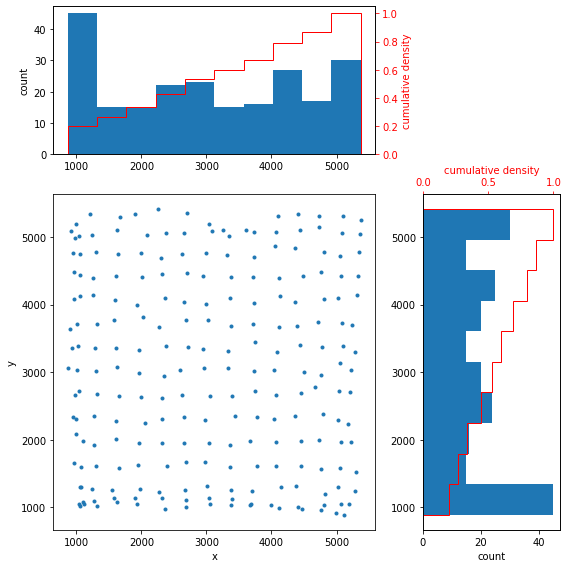

In [6]:
bins = 10
x = motors[:, 0]
y = motors[:, 1]
fig = plt.figure(figsize=(8,8))
gs = gridspec.GridSpec(3, 3)
ax_main = plt.subplot(gs[1:3, :2])
ax_xDist = plt.subplot(gs[0, :2],sharex=ax_main)
ax_yDist = plt.subplot(gs[1:3, 2],sharey=ax_main)
    
ax_main.scatter(x,y,marker='.')
ax_main.set(xlabel="x", ylabel="y")

ax_xDist.hist(x,bins=bins, align='mid')
ax_xDist.set(ylabel='count')
ax_xCumDist = ax_xDist.twinx()
ax_xCumDist.hist(x,bins=bins,cumulative=True,histtype='step',density=True,color='r',align='mid')
ax_xCumDist.tick_params('y', colors='r')
ax_xCumDist.set_ylabel('cumulative density',color='r')

ax_yDist.hist(y,bins=bins,orientation='horizontal',align='mid')
ax_yDist.set(xlabel='count')
ax_yCumDist = ax_yDist.twiny()
ax_yCumDist.hist(y,bins=bins,cumulative=True,histtype='step',density=True,color='r',align='mid',orientation='horizontal')
ax_yCumDist.tick_params('x', colors='r')
ax_yCumDist.set_xlabel('cumulative density',color='r')
fig.tight_layout()
plt.show()

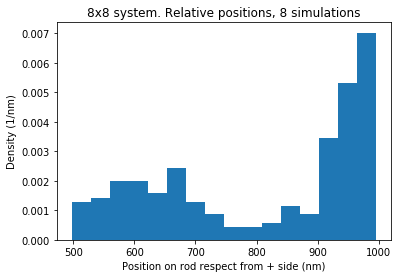

In [15]:
relatives = np.loadtxt('multiple.dat')
plt.hist(relatives, 16, density=True)
plt.ylabel('Density (1/nm)')
plt.xlabel('Position on rod respect from + side (nm)')
plt.title('8x8 system. Relative positions, 8 simulations')
plt.show()

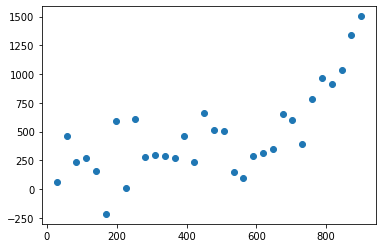

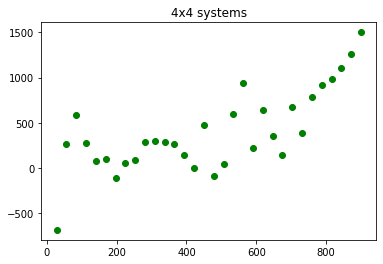

In [30]:
scaling = np.loadtxt('multiple.dat')
x = np.linspace(900/32, 900, 32)
plt.scatter(x, scaling[:, 0][::-1])
plt.show()
plt.scatter(x, scaling[:, 1][::-1], color='green')
plt.title('4x4 systems')
plt.show()